#### Statistics 
    1. Inferential: Dataset consists of data of a small fraction of the total populations
    2. Descriptive: Data from complete polpulation is collected 

In [89]:
import pandas as pd
import numpy as np
import seaborn as sn

In [90]:
df = pd.read_csv("./data/income.csv", names=["name","income"], skiprows=[0])
df # Outlier: data point that is very different from other datapoints in dataset in this case elon.

,name,income
0,Rob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Mohan,8000
5,Tao,5000
6,Elon Musk,10000000


In [91]:
# Use of mean, median, mode
    #  1. Descriptive Analysis
    #  2. Filling NA Values (holes)

df.income.describe() # gives gist of statistics

count    7.000000e+00
mean     1.433643e+06
std      3.777409e+06
min      4.000000e+03
25%      5.000000e+03
50%      6.000000e+03
75%      7.750000e+03
max      1.000000e+07
Name: income, dtype: float64

In [92]:
# Use of percentile
    #  1. Outlier Removal
    #  2. General Analysis(out of 100)  

df.income.quantile(0.99) 

9400479.999999994

In [93]:
# median: 50th percentile
print(df.income.quantile(0.5,interpolation="higher")) # here interpolation gives the element of the dataset that is higher than nearest to the given percentile
print(df.income.quantile(0.5,interpolation="lower")) # here interpolation gives the element of the dataset that is lower than nearest to the given percentile

6000
6000


In [94]:
# Inter-Quartile Range: [25th - 75th] percentile

print(df.income.quantile(0.25,interpolation="higher"))
print(df.income.quantile(0.75,interpolation="higher"))

5000
8000


In [95]:
df

,name,income
0,Rob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Mohan,8000
5,Tao,5000
6,Elon Musk,10000000


In [96]:
# mode: element with maximum frequency in a column
df.mode()

,name,income
0,Elon Musk,5000.0
1,Mohan,NaN
2,Nina,NaN
3,Rafiq,NaN
4,Rob,NaN
5,Sofia,NaN
6,Tao,NaN


In [97]:
df['income'][3]=np.nan

C:\Users\Pratham\AppData\Local\Temp\ipykernel_9968\385840147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'][3]=np.nan


In [98]:
df

,name,income
0,Rob,5000.0
1,Rafiq,6000.0
2,Nina,4000.0
3,Sofia,NaN
4,Mohan,8000.0
5,Tao,5000.0
6,Elon Musk,10000000.0


In [99]:
df.income.mean()

1671333.3333333333

In [100]:
df_new = df.fillna(df.income.mean()) # filling holes with mean
df_new

,name,income
0,Rob,5.000000e+03
1,Rafiq,6.000000e+03
2,Nina,4.000000e+03
3,Sofia,1.671333e+06
4,Mohan,8.000000e+03
5,Tao,5.000000e+03
6,Elon Musk,1.000000e+07


In [101]:
df_new = df.fillna(df.income.median()) # filling holes with median 
df_new

,name,income
0,Rob,5000.0
1,Rafiq,6000.0
2,Nina,4000.0
3,Sofia,5500.0
4,Mohan,8000.0
5,Tao,5000.0
6,Elon Musk,10000000.0


###### Mean Absolute Deviation: using norm L1[Ridge Regression] (Manhattan Distance)
###### Standard Deviation: using norm L2[Lasso Regression] (Euclidean Distance)

#### Normal Distribution

In [102]:
df = pd.read_csv("./data/heights.csv")
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


**(1) Outlier detection and removal using Standard Deviation**

In [103]:
df['height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

<AxesSubplot: xlabel='height', ylabel='Count'>

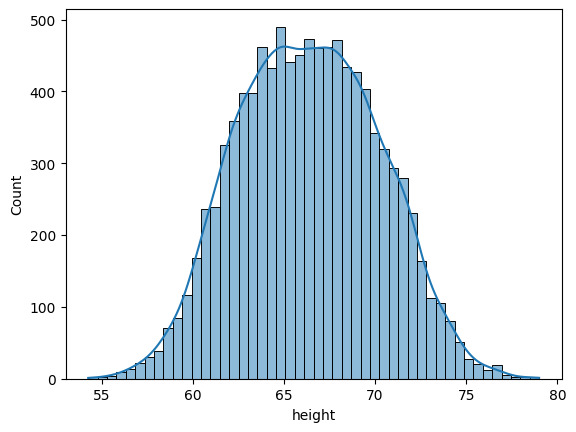

In [104]:
sn.histplot(df['height'], kde=True) # kernel density estimate [KDE] (smoothene the curve)

In [105]:
mean = df.height.mean()
mean

66.367559754866

In [106]:
std_deviation = df.height.std()
std_deviation

3.847528120795573

In [107]:
print(mean-3*std_deviation, mean+3*std_deviation) # Theroitically 99.7% of the frequencies lie in this range

54.824975392479274 77.91014411725271


In [108]:
df[(df.height < 54.82) | (df.height > 77.91)] # Outlier's in the Dataset

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [109]:
df_no_outlier = df[(df.height<77.91) & (df.height>54.82)]
df_no_outlier.shape # removed 7 outliers

(9993, 2)

**(2) Outlier detection and removal using Z Score**

Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

Calculate the Z Score

<img height=200 width=300 src="./images/zscore.png" />

In [110]:
# addding a new column in the dataset for Z-Scores
df['zscore'] = ( df.height - df.height.mean() ) / df.height.std()
df.head(5) # for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [111]:
df.height.mean()

66.367559754866

In [112]:
df.height.std()

3.847528120795573

In [113]:
(73.84-66.37)/3.84 # z-score of first row

1.9453124999999998

In [114]:
df[(df['zscore'] > 3)|(df['zscore'] < -3)] # Outliers i.e zscore range => [-3,3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [115]:
df_no_outlier = df[(df['zscore'] < 3) & (df['zscore'] > -3)]
df_no_outlier.shape # removed 7 outliers

(9993, 3)

**(3) Outlier detection and removal using IQR(Inter Quartile Range)**

    IQR = Q3(75 %ile) - Q1(25 %ile)
    Lower Limit = Q1 - 1.5*IQR
    Upper Limit = Q3 + 1.5*IQR

In [116]:
Q1 = df['height'].quantile(0.25)
Q3 = df['height'].quantile(0.75)
Q1, Q3

(63.505620480000005, 69.17426172750001)

In [117]:
IQR = Q3 - Q1
IQR

5.668641247500005

In [118]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(55.00265860875, 77.67722359875002)

In [119]:
df[(df['height'] < lower_limit) | (df['height'] > upper_limit)] # Outlier's using IQR

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
7294,Female,54.873728,-2.987329
9285,Female,54.263133,-3.146027


In [120]:
df_no_outlier = df[(df['height'] > lower_limit) & (df['height'] < upper_limit)]
df_no_outlier.shape # removed 8 outliers

(9992, 3)

#### Logarithms

In [121]:
df = pd.read_csv("./data/revenue.csv")
df.head(10)

,company,revenue
0,Tesla,31.0
1,UBER,11.0
2,Amazon,386.0
3,Jindal Steel,4.7
4,Axis Bank,5.6
5,Vedanta,11.3


<AxesSubplot: xlabel='company'>

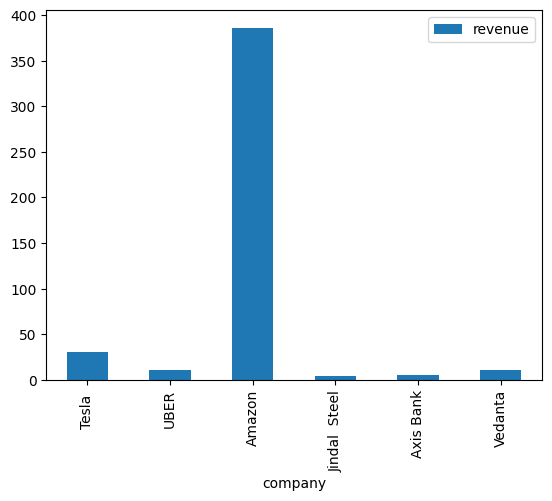

In [122]:
df.plot(x='company', y='revenue', kind='bar')

<AxesSubplot: xlabel='company'>

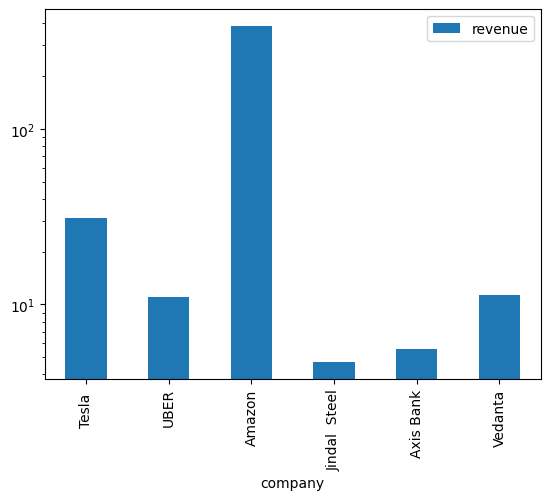

In [123]:
df.plot(x='company', y='revenue', kind='bar', logy=True) # using log we can do better analysis when the data varies exponentially

#### Log Normal Distribution

In [124]:
df = pd.read_csv('./data/income_new.csv')
df.head()

,income($),count
0,5000,4371
1,10000,3295
2,15000,5825
3,20000,6047
4,25000,6097


<AxesSubplot: xlabel='income($)', ylabel='count'>

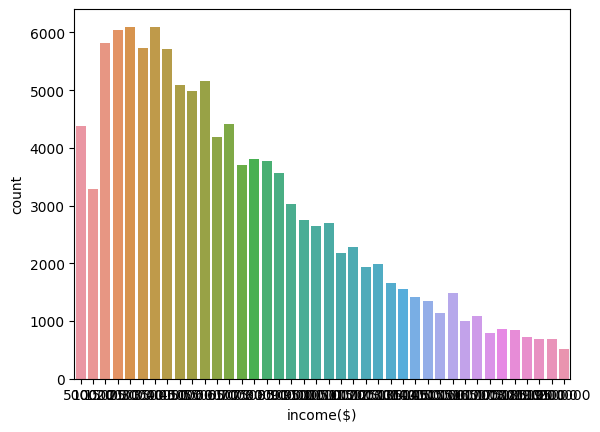

In [125]:
sn.barplot(x='income($)', y='count', data=df)

<AxesSubplot: xlabel='income($)', ylabel='count'>

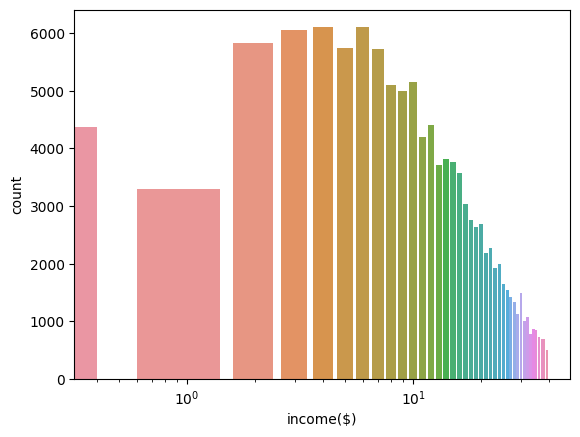

In [126]:
g = sn.barplot(x='income($)', y='count', data=df)
g.set(xscale="log")
g

#### Cosine Similarity
    cosine similarity = (A.B)/|A||B|
    cosine distance = 1 - cosine similarity

In [127]:
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

In [128]:
cosine_similarity([[3,1]],[[6,2]])

array([[1.]])

In [129]:
cosine_similarity([[3,0]],[[0,8]])

array([[0.]])

In [130]:
cosine_similarity([[3,1]],[[3,2]])

array([[0.96476382]])

In [131]:
doc1 = """
iphone sales contributed to 70% of revenue. iphone demand is increasing by 20% yoy. 
the main competitor phone galaxy recorded 5% less growth compared to iphone"
"""

doc2 = """
The upside pressure on volumes for the iPhone 12 series, historical outperformance 
in the July-September time period heading into launch event, and further catalysts in relation
to outperformance for iPhone 13 volumes relative to lowered investor expectations implies a 
very attractive set up for the shares.
"""

doc3 = """
samsung's flagship product galaxy is able to penetrate more into asian markets compared to
iphone. galaxy is redesigned with new look that appeals young demographics. 60% of samsung revenues
are coming from galaxy phone sales
"""

doc4 = """
Samsung Electronics unveils its Galaxy S21 flagship, with modest spec improvements 
and a significantly lower price point. Galaxy S21 price is lower by ~20% (much like the iPhone 12A), 
which highlights Samsung's focus on boosting shipments and regaining market share.
"""

In [132]:
import pandas as pd

df = pd.DataFrame([
        {'iPhone': 3,'galaxy': 1},
        {'iPhone': 2,'galaxy': 0},
        {'iPhone': 1,'galaxy': 3},
        {'iPhone': 1,'galaxy': 2},
    ],
    index=[
        "doc1",
        "doc2",
        "doc3",
        "doc4"
    ])

df

,iPhone,galaxy
doc1,3,1
doc2,2,0
doc3,1,3
doc4,1,2


In [133]:
df.loc["doc1":"doc1"]

,iPhone,galaxy
doc1,3,1


In [134]:
cosine_similarity(df.loc["doc1":"doc1"],df.loc["doc2":"doc2"])

array([[0.9486833]])

In [135]:
cosine_similarity(df.loc["doc1":"doc1"],df.loc["doc3":"doc3"])

array([[0.6]])

In [136]:
cosine_similarity(df.loc["doc3":"doc3"],df.loc["doc4":"doc4"])

array([[0.98994949]])

In [137]:
cosine_similarity(df.loc["doc1":"doc1"],df.loc["doc4":"doc4"])

array([[0.70710678]])

In [138]:
cosine_distances(df.loc["doc1":"doc1"],df.loc["doc4":"doc4"])

array([[0.29289322]])

In [139]:
1-0.70710678

0.29289321999999995

#### A/B Testing 
    Choose the best options among the 2 available options(A, B)
    Factors affecting A/B Testing => Sampling BIAS => Random Distribution of Data [Hypothesis Testing]
                                  => Under Coverage Bias => Enough Samples to conclude ?

#### Hypothesis Testing -> Observed result is not because of random chance. Hence can be concluded for the analysis
    i) Sample Size      ii) Variation in Sample Data

Alternate Hypothesis (Ha): Expected Result from Sample Data.

Null Hypothesis (Ho): Opposite of Alternate Hypothesis. Usually consists facts from previous dataset.

    We try to reject he Null hypothesis & automatically support our claim with Alternate hypothesis

How ? => Z-Test, T-Test, ANOVA, Chi-Square Test, etc. 


#### Modified Z-Score

In [140]:
df = pd.read_csv("./data/movie_revenues.csv")
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/2009,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,54000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",http://www.youmeanddupree.com/,1819,"[{""id"": 1253, ""name"": ""roommate""}, {""id"": 2038...",en,"You, Me and Dupree",After standing in as best man for his longtime...,18.600367,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/14/2006,130431368,108,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Two's company. Dupree's a crowd.,"You, Me and Dupree",5.4,407
2,21000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",NaN,2575,"[{""id"": 246, ""name"": ""dancing""}, {""id"": 470, ""...",en,The Tailor of Panama,A British spy is banished to Panama after havi...,7.047975,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""IE"", ""name"": ""Ireland""}, {""is...",2/11/2001,28008462,109,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"In a place this treacherous, what a good spy n...",The Tailor of Panama,6.2,92
3,1000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",NaN,26791,[],en,Brigham City,Wes Clayton is a lawman and a bishop in a Morm...,0.280083,"[{""name"": ""Main Street Movie Company"", ""id"": 6...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3/30/2001,852206,119,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Brigham City,7.3,4
4,100000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 878, ""nam...",NaN,644,"[{""id"": 310, ""name"": ""artificial intelligence""...",en,A.I. Artificial Intelligence,"A robotic boy, the first programmed to love, D...",34.035114,"[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",6/29/2001,235926552,146,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,David is 11 years old. He weighs 60 pounds. He...,A.I. Artificial Intelligence,6.8,1974


In [142]:
df['revenue'].describe()

count    4.600000e+01
mean     1.879289e+08
std      4.551144e+08
min      8.522060e+05
25%      2.866957e+07
50%      8.381714e+07
75%      1.382135e+08
max      2.787965e+09
Name: revenue, dtype: float64

In [143]:
_, mean, std, _, _, median, *_ = df['revenue'].describe()
print(mean, std, median)

187928898.41304347 455114423.4195407 83817141.5


In [144]:
# Z Score = (X- mean)/std
outliers = df[((df['revenue']-mean)/std < -3) | ((df['revenue']-mean)/std > 3)] 
outliers # no. of outlier's => 1

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/2009,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [145]:
# Abs(X - Median)
df['revenue-median'] = abs(df['revenue'] - median)

In [146]:
# MAD = Median(Abs(X - Median))
MAD = df['revenue-median'].median() # Median Absolute Deviation
MAD

56399542.5

In [147]:
# Modified Z Score = 0.6745*Abs(X - Median)/MAD
outliers = df[(df['revenue-median']*0.6745/MAD < -3.5) | (df['revenue-median']*0.6745/MAD > 3.5)] 
outliers # no. of outliers => 3

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,revenue-median
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,12/10/2009,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2.704148e+09
7,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...",...,6/9/2015,1513528810,124,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662,1.429712e+09
12,25000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",NaN,619,"[{""id"": 1156, ""name"": ""sister sister relations...",en,The Bodyguard,A former Secret Service agent grudgingly takes...,26.576385,"[{""name"": ""Tig Productions"", ""id"": 335}, {""nam...",...,11/25/1992,411006740,129,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Never let her out of your sight. Never let you...,The Bodyguard,6.1,661,3.271896e+08
